In [1]:
from __future__ import print_function
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import keras
from sklearn.decomposition import PCA
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop, Adam, Nadam
import time
import os
#print(os.listdir("./npy_landuse"))

In [2]:
batch_size = 128
num_classes = 5
epochs = 10

In [3]:
x_train = np.load('./npy_rice64/x_train.npy')
y_train = np.load('./npy_rice64/y_train.npy')
x_test=np.load('./npy_rice64/x_test.npy')
y_test=np.load('./npy_rice64/y_test.npy')

In [4]:
x_train.shape

(45000, 64, 64)

In [5]:
x_test.shape

(30000, 64, 64)

In [6]:
y_test.shape

(30000, 5)

In [8]:
# Change from matrix to array --> dimension 64x64 to array of dimention 4096
x_train = x_train.reshape(45000, 4096)
x_test = x_test.reshape(30000, 4096)

In [9]:
y_test.shape

(30000, 5)

In [10]:
# Change to float datatype
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Scale the data to lie between 0 to 1
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

45000 train samples
30000 test samples


In [11]:
# PCA
pca = PCA(n_components=100)

x_train=pca.fit_transform(x_train)
x_test= pca.transform(x_test)

In [14]:
#                      BUILDING THE MODEL
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(100,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
nadam=keras.optimizers.Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy',
              optimizer=nadam,
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               51712     
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 2565      
Total params: 316,933
Trainable params: 316,933
Non-trainable params: 0
_________________________________________________________________


In [15]:
start = time.time() # Measuring the processing time
#                      TRAINING THE MODEL
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=100,
                    verbose=1,
                    validation_data=(x_test, y_test))
end = time.time()
print(end - start)


Epoch 1/100
352/352 [==============================] - 3s 9ms/step - loss: 0.6785 - accuracy: 0.8453 - val_loss: 0.1907 - val_accuracy: 0.9491
Epoch 2/100
352/352 [==============================] - 3s 8ms/step - loss: 0.1502 - accuracy: 0.9553 - val_loss: 0.1164 - val_accuracy: 0.9637
Epoch 3/100
352/352 [==============================] - 3s 8ms/step - loss: 0.1126 - accuracy: 0.9632 - val_loss: 0.1047 - val_accuracy: 0.9642
Epoch 4/100
352/352 [==============================] - 3s 8ms/step - loss: 0.0993 - accuracy: 0.9669 - val_loss: 0.0964 - val_accuracy: 0.9668
Epoch 5/100
352/352 [==============================] - 3s 8ms/step - loss: 0.0917 - accuracy: 0.9691 - val_loss: 0.0866 - val_accuracy: 0.9705
Epoch 6/100
352/352 [==============================] - 3s 8ms/step - loss: 0.0866 - accuracy: 0.9706 - val_loss: 0.0826 - val_accuracy: 0.9720
Epoch 7/100
352/352 [==============================] - 3s 8ms/step - loss: 0.0816 - accuracy: 0.9724 - val_loss: 0.0829 - val_accuracy: 0.9711

Epoch 58/100
352/352 [==============================] - 3s 8ms/step - loss: 0.0523 - accuracy: 0.9816 - val_loss: 0.0672 - val_accuracy: 0.9768
Epoch 59/100
352/352 [==============================] - 3s 8ms/step - loss: 0.0525 - accuracy: 0.9820 - val_loss: 0.0698 - val_accuracy: 0.9760
Epoch 60/100
352/352 [==============================] - 3s 8ms/step - loss: 0.0518 - accuracy: 0.9820 - val_loss: 0.0646 - val_accuracy: 0.9781
Epoch 61/100
352/352 [==============================] - 3s 8ms/step - loss: 0.0509 - accuracy: 0.9819 - val_loss: 0.0688 - val_accuracy: 0.9765
Epoch 62/100
352/352 [==============================] - 3s 8ms/step - loss: 0.0508 - accuracy: 0.9824 - val_loss: 0.0662 - val_accuracy: 0.9769
Epoch 63/100
352/352 [==============================] - 3s 8ms/step - loss: 0.0507 - accuracy: 0.9823 - val_loss: 0.0666 - val_accuracy: 0.9774
Epoch 64/100
352/352 [==============================] - 3s 8ms/step - loss: 0.0506 - accuracy: 0.9820 - val_loss: 0.0669 - val_accuracy:

In [16]:
#                      EVALUATE TRAINED MODEL
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.06737837940454483
Test accuracy: 0.9787333607673645


In [17]:
model.save('mlp_weights_1.h5')

In [18]:
model.load_weights('mlp_weights_1.h5')

In [20]:
model_feat = Model(inputs=model.input,outputs=model.get_layer('dense_5').output)

feat_train = model_feat.predict(x_train)
print(feat_train.shape)

#feat_val = model_feat.predict(x_val)
#print(feat_val.shape)

feat_test = model_feat.predict(x_test)
print(feat_test.shape)

(45000, 5)
(30000, 5)


In [21]:
from keras import metrics
from sklearn.metrics import confusion_matrix

In [22]:
pred = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [23]:
confusion_matrix(pred, np.argmax(y_test,axis =1))

array([[5821,    1,   12,    8,  135],
       [   0, 5857,    0,  110,    0],
       [   2,    0, 5903,    7,    0],
       [  20,  138,   25, 5892,    0],
       [ 180,    0,    0,    0, 5889]], dtype=int64)

In [24]:
import seaborn as sns

In [25]:
def plot_heatmap(cm,title):
    df_cm2 = pd.DataFrame(cm, index = ['Arborio', 'Basmati','Ipsala','Jasmine','Karacadag'])
    df_cm2.columns=['Arborio', 'Basmati','Ipsala','Jasmine','Karacadag']
    f,ax = plt.subplots(figsize=(12, 12))
    #ax = plt.axes()
    sns.heatmap(df_cm2, annot=True, fmt="d", linewidths=.5,ax=ax)
    ax.set_title(title)
    plt.show()    
    return

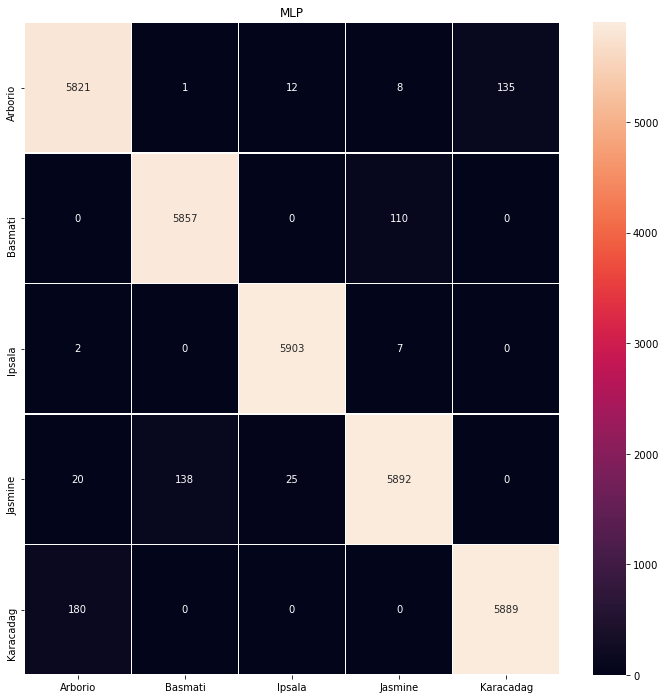

In [26]:
plot_heatmap(confusion_matrix(pred, np.argmax(y_test,axis =1)),'MLP')

In [28]:
from sklearn.metrics import classification_report
print(classification_report(pred, np.argmax(y_test,axis =1),digits=4))

              precision    recall  f1-score   support

           0     0.9665    0.9739    0.9702      5977
           1     0.9768    0.9816    0.9792      5967
           2     0.9938    0.9985    0.9961      5912
           3     0.9792    0.9699    0.9745      6075
           4     0.9776    0.9703    0.9740      6069

    accuracy                         0.9787     30000
   macro avg     0.9788    0.9788    0.9788     30000
weighted avg     0.9787    0.9787    0.9787     30000



In [29]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf')
start = time.time() # Measuring the processing time
svm.fit(feat_train,np.argmax(y_train,axis=1))
end = time.time()
print(end - start)


print('fitting done !!!')

2.1870415210723877
fitting done !!!


In [30]:
svm.score(feat_train,np.argmax(y_train,axis=1))

0.9881777777777778

In [31]:
svm.score(feat_test,np.argmax(y_test,axis=1))

0.9792333333333333

In [32]:
Pred_labels = svm.predict(feat_test)

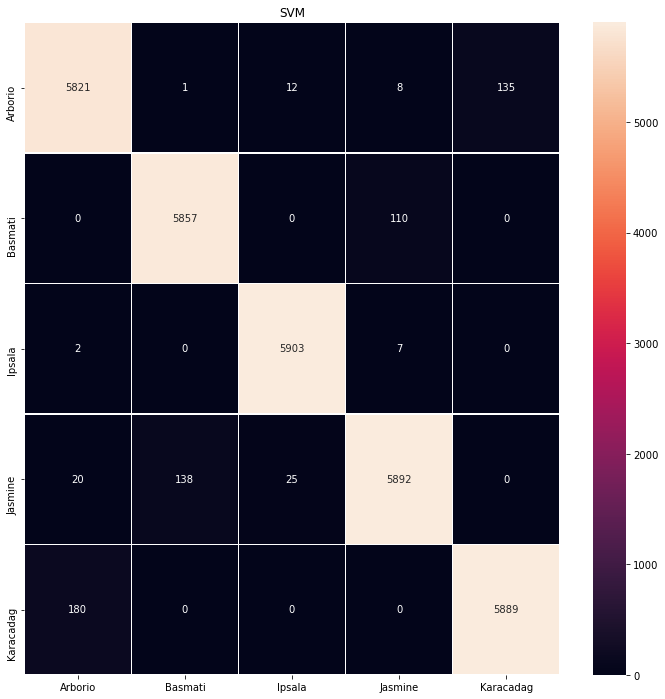

In [33]:
plot_heatmap(confusion_matrix(pred, np.argmax(y_test,axis =1)),'SVM')

In [34]:
print(classification_report(Pred_labels, np.argmax(y_test,axis =1),digits=4))

              precision    recall  f1-score   support

           0     0.9685    0.9727    0.9705      5997
           1     0.9802    0.9802    0.9802      5996
           2     0.9944    0.9981    0.9963      5918
           3     0.9772    0.9737    0.9754      6039
           4     0.9761    0.9719    0.9740      6050

    accuracy                         0.9792     30000
   macro avg     0.9793    0.9793    0.9793     30000
weighted avg     0.9792    0.9792    0.9792     30000



# Applying XGBOOST

In [35]:
import xgboost as xgb

xb = xgb.XGBClassifier()
start = time.time() # Measuring the processing time
xb.fit(feat_train,np.argmax(y_train,axis=1))
end = time.time()
print(end - start)

print('fitting done !!!')

6.098168611526489
fitting done !!!


In [36]:
xb.score(feat_train,np.argmax(y_train,axis=1))

0.9989777777777777

In [37]:
xb.score(feat_test,np.argmax(y_test,axis=1))

0.9780333333333333

In [38]:
Pred_labels = xb.predict(feat_test)

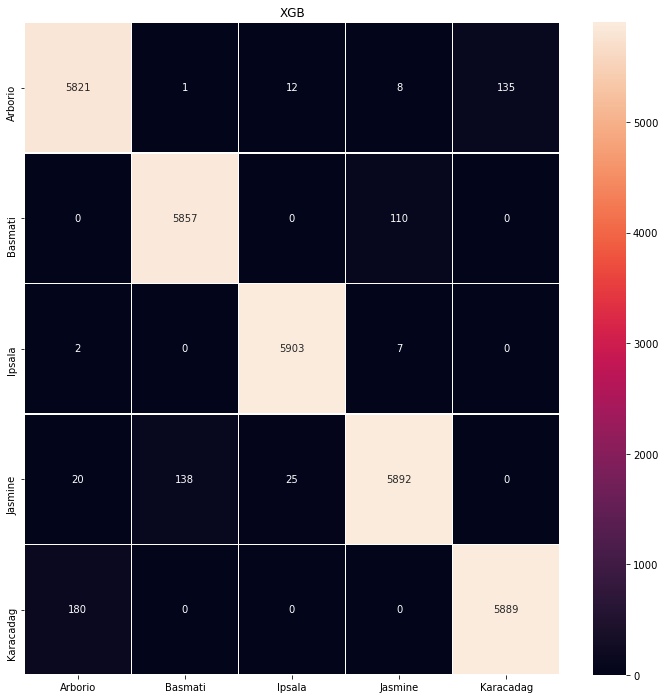

In [39]:
plot_heatmap(confusion_matrix(pred, np.argmax(y_test,axis =1)),'XGB')

In [40]:
print(classification_report(Pred_labels, np.argmax(y_test,axis =1),digits=4))

              precision    recall  f1-score   support

           0     0.9678    0.9699    0.9688      6010
           1     0.9782    0.9801    0.9791      5984
           2     0.9941    0.9980    0.9960      5917
           3     0.9764    0.9714    0.9739      6048
           4     0.9739    0.9712    0.9726      6041

    accuracy                         0.9780     30000
   macro avg     0.9781    0.9781    0.9781     30000
weighted avg     0.9780    0.9780    0.9780     30000



In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import model_selection

In [42]:
lr = LogisticRegression()
start = time.time() # Measuring the processing time
lr.fit(feat_train,np.argmax(y_train,axis=1))
end = time.time()
print(end - start)

print('fitting done !!!')

1.3285021781921387
fitting done !!!


In [43]:
Pred_labels = lr.predict(feat_test)
print(classification_report(Pred_labels, np.argmax(y_test,axis =1),digits=4))

              precision    recall  f1-score   support

           0     0.9681    0.9725    0.9703      5996
           1     0.9778    0.9809    0.9794      5977
           2     0.9938    0.9981    0.9960      5914
           3     0.9781    0.9711    0.9746      6060
           4     0.9763    0.9716    0.9739      6053

    accuracy                         0.9788     30000
   macro avg     0.9788    0.9789    0.9788     30000
weighted avg     0.9788    0.9788    0.9788     30000



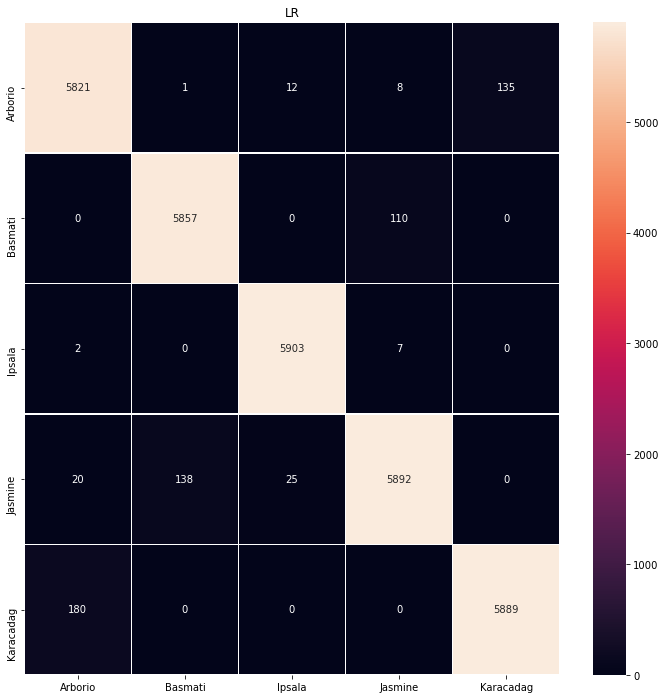

In [44]:
plot_heatmap(confusion_matrix(pred, np.argmax(y_test,axis =1)),'LR')

In [45]:
dt = DecisionTreeClassifier()
start = time.time() # Measuring the processing time
dt.fit(feat_train,np.argmax(y_train,axis=1))
end = time.time()
print(end - start)

print('fitting done !!!')
Pred_labels = dt.predict(feat_test)
print(classification_report(Pred_labels, np.argmax(y_test,axis =1),digits=4))

0.1887526512145996
fitting done !!!
              precision    recall  f1-score   support

           0     0.9616    0.9612    0.9614      6026
           1     0.9735    0.9733    0.9734      5997
           2     0.9941    0.9968    0.9954      5924
           3     0.9688    0.9663    0.9675      6032
           4     0.9648    0.9653    0.9650      6021

    accuracy                         0.9725     30000
   macro avg     0.9726    0.9726    0.9726     30000
weighted avg     0.9725    0.9725    0.9725     30000



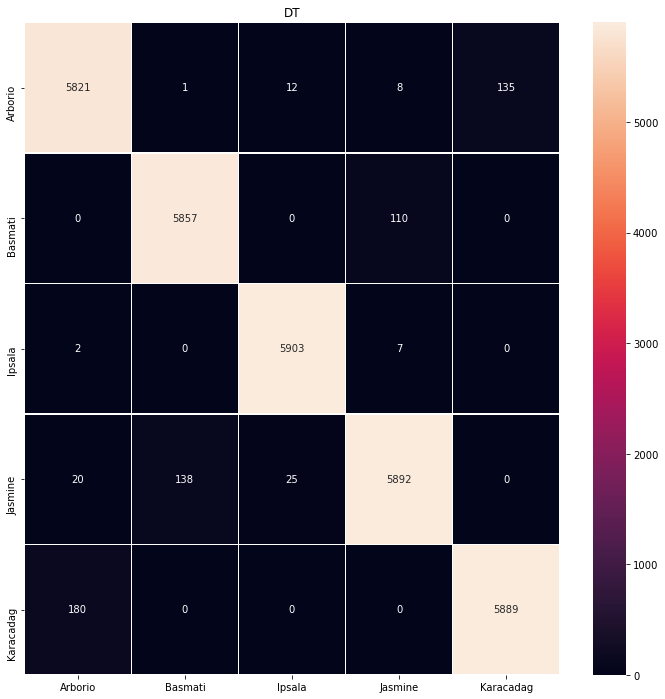

In [46]:
plot_heatmap(confusion_matrix(pred, np.argmax(y_test,axis =1)),'DT')

In [47]:
knn = KNeighborsClassifier()
start = time.time() # Measuring the processing time
knn.fit(feat_train,np.argmax(y_train,axis=1))
end = time.time()
print(end - start)

print('fitting done !!!')
Pred_labels = knn.predict(feat_test)
print(classification_report(Pred_labels, np.argmax(y_test,axis =1),digits=4))

0.08626818656921387
fitting done !!!
              precision    recall  f1-score   support

           0     0.9676    0.9688    0.9682      6016
           1     0.9777    0.9796    0.9786      5984
           2     0.9944    0.9980    0.9962      5919
           3     0.9764    0.9714    0.9739      6048
           4     0.9723    0.9708    0.9716      6033

    accuracy                         0.9776     30000
   macro avg     0.9777    0.9777    0.9777     30000
weighted avg     0.9776    0.9776    0.9776     30000



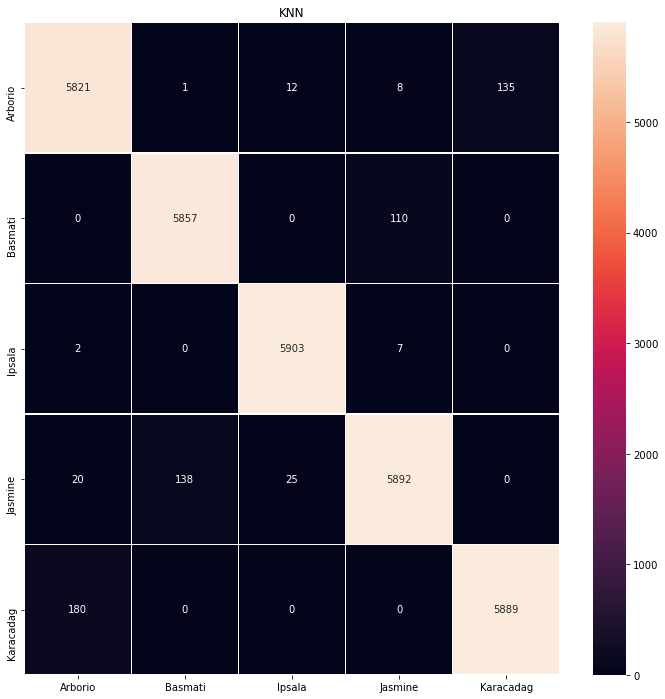

In [48]:
plot_heatmap(confusion_matrix(pred, np.argmax(y_test,axis =1)),'KNN')

In [49]:
lda = LinearDiscriminantAnalysis()
start = time.time() # Measuring the processing time
lda.fit(feat_train,np.argmax(y_train,axis=1))
end = time.time()
print(end - start)

print('fitting done !!!')
Pred_labels = lda.predict(feat_test)
print(classification_report(Pred_labels, np.argmax(y_test,axis =1),digits=4))

0.049839019775390625
fitting done !!!
              precision    recall  f1-score   support

           0     0.9665    0.9737    0.9701      5978
           1     0.9772    0.9812    0.9792      5971
           2     0.9938    0.9985    0.9961      5912
           3     0.9789    0.9702    0.9745      6071
           4     0.9774    0.9703    0.9739      6068

    accuracy                         0.9787     30000
   macro avg     0.9787    0.9788    0.9788     30000
weighted avg     0.9787    0.9787    0.9787     30000



In [50]:
nb = GaussianNB()
start = time.time() # Measuring the processing time
nb.fit(feat_train,np.argmax(y_train,axis=1))
end = time.time()
print(end - start)

print('fitting done !!!')
Pred_labels = nb.predict(feat_test)
print(classification_report(Pred_labels, np.argmax(y_test,axis =1),digits=4))

0.01595759391784668
fitting done !!!
              precision    recall  f1-score   support

           0     0.9656    0.9745    0.9701      5968
           1     0.9803    0.9797    0.9800      6000
           2     0.9946    0.9973    0.9960      5924
           3     0.9759    0.9743    0.9751      6027
           4     0.9788    0.9696    0.9741      6081

    accuracy                         0.9790     30000
   macro avg     0.9790    0.9791    0.9790     30000
weighted avg     0.9790    0.9790    0.9790     30000



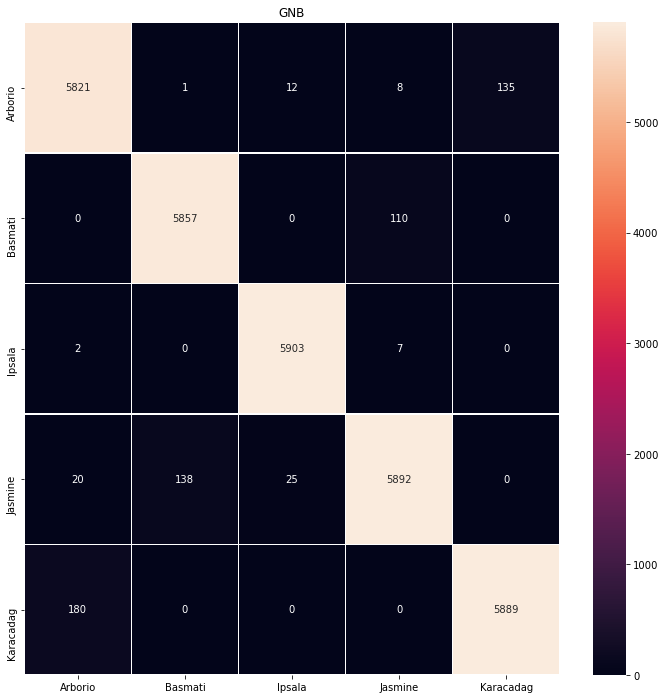

In [51]:
plot_heatmap(confusion_matrix(pred, np.argmax(y_test,axis =1)),'GNB')

In [52]:
et = ExtraTreesClassifier()
start = time.time() # Measuring the processing time
et.fit(feat_train,np.argmax(y_train,axis=1))
end = time.time()
print(end - start)

print('fitting done !!!')
Pred_labels = et.predict(feat_test)
print(classification_report(Pred_labels, np.argmax(y_test,axis =1),digits=4))

1.8067638874053955
fitting done !!!
              precision    recall  f1-score   support

           0     0.9651    0.9666    0.9659      6014
           1     0.9728    0.9798    0.9763      5953
           2     0.9939    0.9973    0.9956      5920
           3     0.9761    0.9664    0.9712      6077
           4     0.9706    0.9687    0.9697      6036

    accuracy                         0.9757     30000
   macro avg     0.9757    0.9758    0.9757     30000
weighted avg     0.9757    0.9757    0.9757     30000



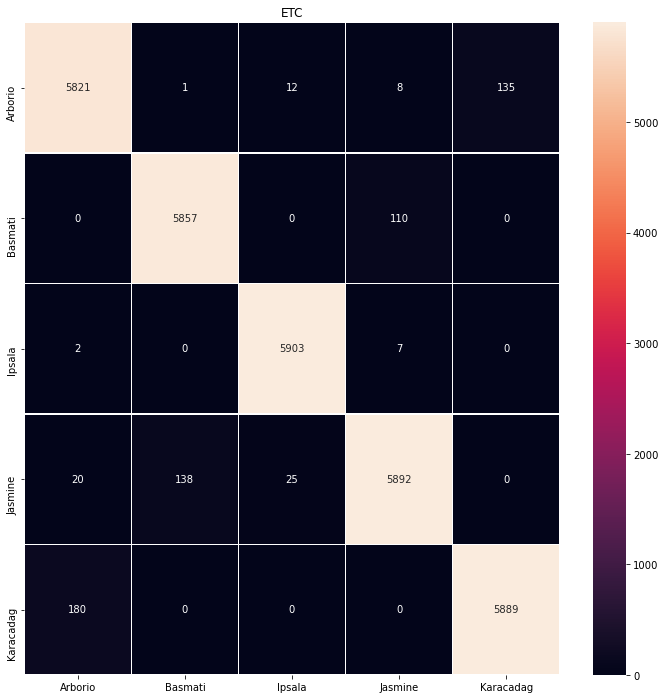

In [53]:
plot_heatmap(confusion_matrix(pred, np.argmax(y_test,axis =1)),'ETC')

In [54]:
rf = RandomForestClassifier()
start = time.time() # Measuring the processing time
rf.fit(feat_train,np.argmax(y_train,axis=1))
end = time.time()
print(end - start) # Total

print('fitting done !!!')
Pred_labels = et.predict(feat_test)
print(classification_report(Pred_labels, np.argmax(y_test,axis =1), digits=4))

5.863572597503662
fitting done !!!
              precision    recall  f1-score   support

           0     0.9651    0.9666    0.9659      6014
           1     0.9728    0.9798    0.9763      5953
           2     0.9939    0.9973    0.9956      5920
           3     0.9761    0.9664    0.9712      6077
           4     0.9706    0.9687    0.9697      6036

    accuracy                         0.9757     30000
   macro avg     0.9757    0.9758    0.9757     30000
weighted avg     0.9757    0.9757    0.9757     30000



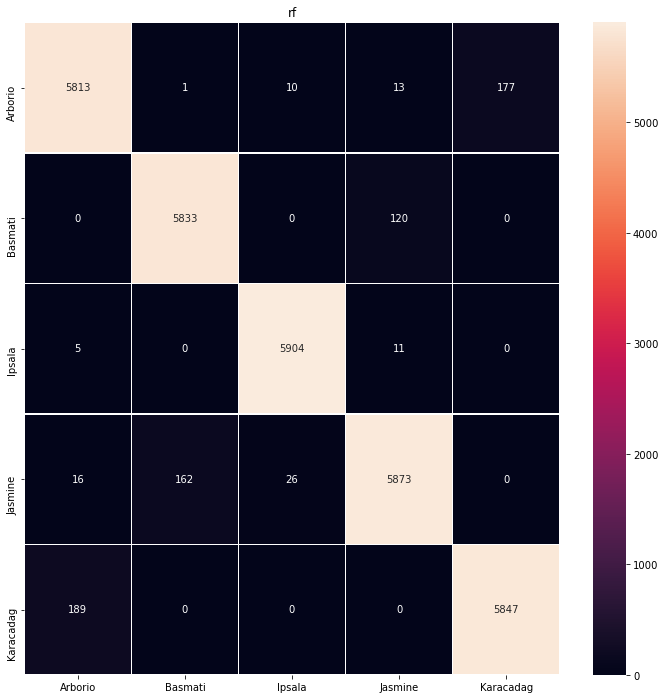

In [55]:
plot_heatmap(confusion_matrix(Pred_labels, np.argmax(y_test,axis =1)),'rf')

In [56]:
import lightgbm as lgb
lg = lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
start = time.time() # Measuring the processing time
lg.fit(feat_train,np.argmax(y_train,axis=1))
end = time.time()
print(end - start) # Total

print('fitting done !!!')
Pred_labels = et.predict(feat_test)
print(classification_report(Pred_labels, np.argmax(y_test,axis =1), digits=4))

0.8475921154022217
fitting done !!!
              precision    recall  f1-score   support

           0     0.9651    0.9666    0.9659      6014
           1     0.9728    0.9798    0.9763      5953
           2     0.9939    0.9973    0.9956      5920
           3     0.9761    0.9664    0.9712      6077
           4     0.9706    0.9687    0.9697      6036

    accuracy                         0.9757     30000
   macro avg     0.9757    0.9758    0.9757     30000
weighted avg     0.9757    0.9757    0.9757     30000



In [57]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier()
start = time.time() # Measuring the processing time
cb.fit(feat_train,np.argmax(y_train,axis=1))
end = time.time()
print(end - start) # Total

print('fitting done !!!')
Pred_labels = et.predict(feat_test)
print(classification_report(Pred_labels, np.argmax(y_test,axis =1), digits=4))

Learning rate set to 0.096081
0:	learn: 1.2580024	total: 162ms	remaining: 2m 41s
1:	learn: 1.0387481	total: 192ms	remaining: 1m 35s
2:	learn: 0.8805702	total: 224ms	remaining: 1m 14s
3:	learn: 0.7590282	total: 255ms	remaining: 1m 3s
4:	learn: 0.6620459	total: 279ms	remaining: 55.5s
5:	learn: 0.5820861	total: 309ms	remaining: 51.2s
6:	learn: 0.5159064	total: 340ms	remaining: 48.2s
7:	learn: 0.4595883	total: 368ms	remaining: 45.6s
8:	learn: 0.4117102	total: 394ms	remaining: 43.4s
9:	learn: 0.3700610	total: 424ms	remaining: 42s
10:	learn: 0.3336535	total: 455ms	remaining: 40.9s
11:	learn: 0.3020689	total: 477ms	remaining: 39.3s
12:	learn: 0.2742976	total: 497ms	remaining: 37.8s
13:	learn: 0.2498415	total: 518ms	remaining: 36.5s
14:	learn: 0.2281612	total: 539ms	remaining: 35.4s
15:	learn: 0.2090848	total: 563ms	remaining: 34.6s
16:	learn: 0.1916500	total: 585ms	remaining: 33.8s
17:	learn: 0.1765460	total: 612ms	remaining: 33.4s
18:	learn: 0.1627006	total: 633ms	remaining: 32.7s
19:	learn:

161:	learn: 0.0311205	total: 4.12s	remaining: 21.3s
162:	learn: 0.0310946	total: 4.14s	remaining: 21.3s
163:	learn: 0.0310694	total: 4.17s	remaining: 21.2s
164:	learn: 0.0310537	total: 4.19s	remaining: 21.2s
165:	learn: 0.0310334	total: 4.21s	remaining: 21.2s
166:	learn: 0.0310213	total: 4.23s	remaining: 21.1s
167:	learn: 0.0309799	total: 4.26s	remaining: 21.1s
168:	learn: 0.0309368	total: 4.28s	remaining: 21s
169:	learn: 0.0309090	total: 4.31s	remaining: 21s
170:	learn: 0.0308864	total: 4.33s	remaining: 21s
171:	learn: 0.0308565	total: 4.35s	remaining: 21s
172:	learn: 0.0308234	total: 4.37s	remaining: 20.9s
173:	learn: 0.0308011	total: 4.4s	remaining: 20.9s
174:	learn: 0.0307818	total: 4.42s	remaining: 20.8s
175:	learn: 0.0307429	total: 4.44s	remaining: 20.8s
176:	learn: 0.0307181	total: 4.47s	remaining: 20.8s
177:	learn: 0.0306878	total: 4.49s	remaining: 20.8s
178:	learn: 0.0306673	total: 4.52s	remaining: 20.7s
179:	learn: 0.0306459	total: 4.54s	remaining: 20.7s
180:	learn: 0.0306142

321:	learn: 0.0279852	total: 7.74s	remaining: 16.3s
322:	learn: 0.0279668	total: 7.76s	remaining: 16.3s
323:	learn: 0.0279577	total: 7.79s	remaining: 16.2s
324:	learn: 0.0279418	total: 7.81s	remaining: 16.2s
325:	learn: 0.0279224	total: 7.83s	remaining: 16.2s
326:	learn: 0.0278880	total: 7.85s	remaining: 16.2s
327:	learn: 0.0278730	total: 7.87s	remaining: 16.1s
328:	learn: 0.0278532	total: 7.89s	remaining: 16.1s
329:	learn: 0.0278447	total: 7.92s	remaining: 16.1s
330:	learn: 0.0278345	total: 7.94s	remaining: 16.1s
331:	learn: 0.0278157	total: 7.96s	remaining: 16s
332:	learn: 0.0278006	total: 7.99s	remaining: 16s
333:	learn: 0.0277882	total: 8.01s	remaining: 16s
334:	learn: 0.0277676	total: 8.03s	remaining: 15.9s
335:	learn: 0.0277515	total: 8.05s	remaining: 15.9s
336:	learn: 0.0277339	total: 8.08s	remaining: 15.9s
337:	learn: 0.0277221	total: 8.1s	remaining: 15.9s
338:	learn: 0.0277112	total: 8.12s	remaining: 15.8s
339:	learn: 0.0276982	total: 8.14s	remaining: 15.8s
340:	learn: 0.02767

488:	learn: 0.0257209	total: 11.5s	remaining: 12s
489:	learn: 0.0257156	total: 11.5s	remaining: 12s
490:	learn: 0.0256957	total: 11.5s	remaining: 11.9s
491:	learn: 0.0256812	total: 11.5s	remaining: 11.9s
492:	learn: 0.0256668	total: 11.6s	remaining: 11.9s
493:	learn: 0.0256592	total: 11.6s	remaining: 11.9s
494:	learn: 0.0256381	total: 11.6s	remaining: 11.8s
495:	learn: 0.0256285	total: 11.6s	remaining: 11.8s
496:	learn: 0.0256124	total: 11.7s	remaining: 11.8s
497:	learn: 0.0255848	total: 11.7s	remaining: 11.8s
498:	learn: 0.0255716	total: 11.7s	remaining: 11.7s
499:	learn: 0.0255646	total: 11.7s	remaining: 11.7s
500:	learn: 0.0255478	total: 11.7s	remaining: 11.7s
501:	learn: 0.0255379	total: 11.8s	remaining: 11.7s
502:	learn: 0.0255292	total: 11.8s	remaining: 11.6s
503:	learn: 0.0255146	total: 11.8s	remaining: 11.6s
504:	learn: 0.0255058	total: 11.8s	remaining: 11.6s
505:	learn: 0.0254985	total: 11.9s	remaining: 11.6s
506:	learn: 0.0254931	total: 11.9s	remaining: 11.5s
507:	learn: 0.02

650:	learn: 0.0239366	total: 15.1s	remaining: 8.08s
651:	learn: 0.0239305	total: 15.1s	remaining: 8.06s
652:	learn: 0.0239198	total: 15.1s	remaining: 8.03s
653:	learn: 0.0239139	total: 15.1s	remaining: 8.01s
654:	learn: 0.0239026	total: 15.2s	remaining: 7.98s
655:	learn: 0.0238869	total: 15.2s	remaining: 7.96s
656:	learn: 0.0238835	total: 15.2s	remaining: 7.94s
657:	learn: 0.0238743	total: 15.2s	remaining: 7.91s
658:	learn: 0.0238634	total: 15.2s	remaining: 7.89s
659:	learn: 0.0238533	total: 15.3s	remaining: 7.87s
660:	learn: 0.0238379	total: 15.3s	remaining: 7.84s
661:	learn: 0.0238292	total: 15.3s	remaining: 7.82s
662:	learn: 0.0238204	total: 15.3s	remaining: 7.8s
663:	learn: 0.0238097	total: 15.4s	remaining: 7.77s
664:	learn: 0.0237958	total: 15.4s	remaining: 7.75s
665:	learn: 0.0237893	total: 15.4s	remaining: 7.72s
666:	learn: 0.0237780	total: 15.4s	remaining: 7.7s
667:	learn: 0.0237596	total: 15.5s	remaining: 7.68s
668:	learn: 0.0237509	total: 15.5s	remaining: 7.66s
669:	learn: 0.

811:	learn: 0.0224340	total: 18.7s	remaining: 4.32s
812:	learn: 0.0224238	total: 18.7s	remaining: 4.29s
813:	learn: 0.0224140	total: 18.7s	remaining: 4.27s
814:	learn: 0.0223989	total: 18.7s	remaining: 4.25s
815:	learn: 0.0223905	total: 18.7s	remaining: 4.23s
816:	learn: 0.0223669	total: 18.8s	remaining: 4.2s
817:	learn: 0.0223592	total: 18.8s	remaining: 4.18s
818:	learn: 0.0223473	total: 18.8s	remaining: 4.16s
819:	learn: 0.0223395	total: 18.8s	remaining: 4.13s
820:	learn: 0.0223334	total: 18.9s	remaining: 4.11s
821:	learn: 0.0223238	total: 18.9s	remaining: 4.09s
822:	learn: 0.0223119	total: 18.9s	remaining: 4.06s
823:	learn: 0.0223043	total: 18.9s	remaining: 4.04s
824:	learn: 0.0222930	total: 18.9s	remaining: 4.02s
825:	learn: 0.0222814	total: 19s	remaining: 4s
826:	learn: 0.0222755	total: 19s	remaining: 3.97s
827:	learn: 0.0222700	total: 19s	remaining: 3.95s
828:	learn: 0.0222613	total: 19s	remaining: 3.92s
829:	learn: 0.0222521	total: 19.1s	remaining: 3.9s
830:	learn: 0.0222360	tot

972:	learn: 0.0211323	total: 22.2s	remaining: 617ms
973:	learn: 0.0211265	total: 22.3s	remaining: 594ms
974:	learn: 0.0211172	total: 22.3s	remaining: 571ms
975:	learn: 0.0211110	total: 22.3s	remaining: 548ms
976:	learn: 0.0211045	total: 22.3s	remaining: 525ms
977:	learn: 0.0210913	total: 22.3s	remaining: 503ms
978:	learn: 0.0210842	total: 22.4s	remaining: 480ms
979:	learn: 0.0210687	total: 22.4s	remaining: 457ms
980:	learn: 0.0210620	total: 22.4s	remaining: 434ms
981:	learn: 0.0210542	total: 22.4s	remaining: 411ms
982:	learn: 0.0210487	total: 22.5s	remaining: 388ms
983:	learn: 0.0210366	total: 22.5s	remaining: 366ms
984:	learn: 0.0210259	total: 22.5s	remaining: 343ms
985:	learn: 0.0210155	total: 22.5s	remaining: 320ms
986:	learn: 0.0210124	total: 22.5s	remaining: 297ms
987:	learn: 0.0210078	total: 22.6s	remaining: 274ms
988:	learn: 0.0210023	total: 22.6s	remaining: 251ms
989:	learn: 0.0209934	total: 22.6s	remaining: 228ms
990:	learn: 0.0209877	total: 22.6s	remaining: 206ms
991:	learn: 

In [58]:
estimators = list()
estimators.append(('RF', RandomForestClassifier()))
estimators.append(('LR', LogisticRegression()))
estimators.append(('DTC', DecisionTreeClassifier()))
estimators.append(('KNN', KNeighborsClassifier()))
estimators.append(('LDA', LinearDiscriminantAnalysis()))
estimators.append(('NB', GaussianNB()))
#estimators.append(('SVM', GradientBoostingClassifier(learning_rate=0.01, n_estimators=1500,max_depth=4, min_samples_split=40, min_samples_leaf=7,max_features=4 , subsample=0.95, random_state=10)))
estimators.append(('XGB', XGBClassifier()))

In [59]:
ensemble = VotingClassifier(estimators=estimators, voting='soft')
start = time.time() # Measuring the processing time
ensemble.fit(feat_train,np.argmax(y_train,axis=1))
end = time.time()
print(end - start)

print('fitting done !!!')
Pred_labels = ensemble.predict(feat_test)
print(classification_report(Pred_labels, np.argmax(y_test,axis =1),digits=4))

12.870599746704102
fitting done !!!
              precision    recall  f1-score   support

           0     0.9673    0.9747    0.9710      5977
           1     0.9787    0.9808    0.9797      5983
           2     0.9941    0.9981    0.9961      5916
           3     0.9776    0.9717    0.9746      6053
           4     0.9786    0.9710    0.9748      6071

    accuracy                         0.9792     30000
   macro avg     0.9792    0.9793    0.9793     30000
weighted avg     0.9792    0.9792    0.9792     30000



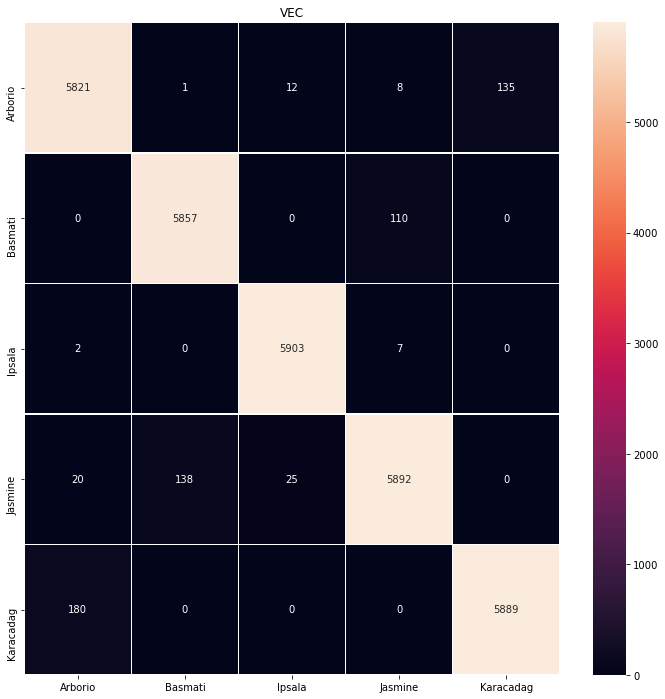

In [60]:
plot_heatmap(confusion_matrix(pred, np.argmax(y_test,axis =1)),'VEC')